In [2]:
import sys
sys.path.append("creation_functions")

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from creation_functions.dataset_creation import create_time_series_speed_up

In [4]:
ACTIVITY_CODES = ["dws", "jog", "sit", "std", "ups", "wlk"]

TRIAL_CODES = {
    ACTIVITY_CODES[0]:[1,2,11],
    ACTIVITY_CODES[1]:[9,16],
    ACTIVITY_CODES[2]:[5,13],
    ACTIVITY_CODES[3]:[6,14],
    ACTIVITY_CODES[4]:[3,4,12],
    ACTIVITY_CODES[5]:[7,8,15]
}

ACTORS = np.linspace(1, 24, 24).astype(int)

### Step 1: We load the dataset and we take a first look at sample
In this first phase of pre-processing we want take a look at two datasets:
- The "raw" _MotionSense_, from which we select a subset of the sensors used in the original experiment; in particular, we dropped the "attitude" and the "gravity" sensor because we have too much different sensors in our phone. So, thinking about comparing the entire work with some personal experiments, we decided to leave them out.
- The "collapsed" dataaset, which is the version in which each group of samples has been collapsed in a single row during the feature extraction process.

_A Note_: To have a look at how feature extraction has been performed, please open the <NomeNoteBookDoveCiStaLaFeatureExtraction>.

In [4]:
raw_dataset = create_time_series_speed_up(ACTIVITY_CODES, TRIAL_CODES, ACTORS, mode="raw")

In [5]:
collapsed_dataset = create_time_series_speed_up(ACTIVITY_CODES, TRIAL_CODES, ACTORS)

In [6]:
raw_dataset.isna().sum()

rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
class                 0
dtype: int64

In [7]:
collapsed_dataset.isna().sum()

rotationRate.x_mean        0
rotationRate.x_std         0
rotationRate.x_range       0
rotationRate.x_IRQ         0
rotationRate.x_kurtosis    0
                          ..
userAcceleration.zP#2      0
userAcceleration.zP#3      0
userAcceleration.zP#4      0
userAcceleration.zP#5      0
class                      0
Length: 97, dtype: int64

In [8]:
raw_dataset

,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,class
0,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,dws
1,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,dws
2,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,dws
3,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,dws
4,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,dws
...,...,...,...,...,...,...,...
2055,1.446270,2.409207,-1.052698,0.034354,-0.574501,0.060144,wlk
2056,0.602010,2.675064,-0.472482,0.547953,-0.481645,-0.232273,wlk
2057,1.125564,4.413143,1.581002,0.910034,0.194606,-0.770222,wlk
2058,0.086910,0.436147,1.762577,0.811333,0.424518,-0.716784,wlk


[Text(0.5, 1.0, 'Class Distribution (Collapsed Data)')]

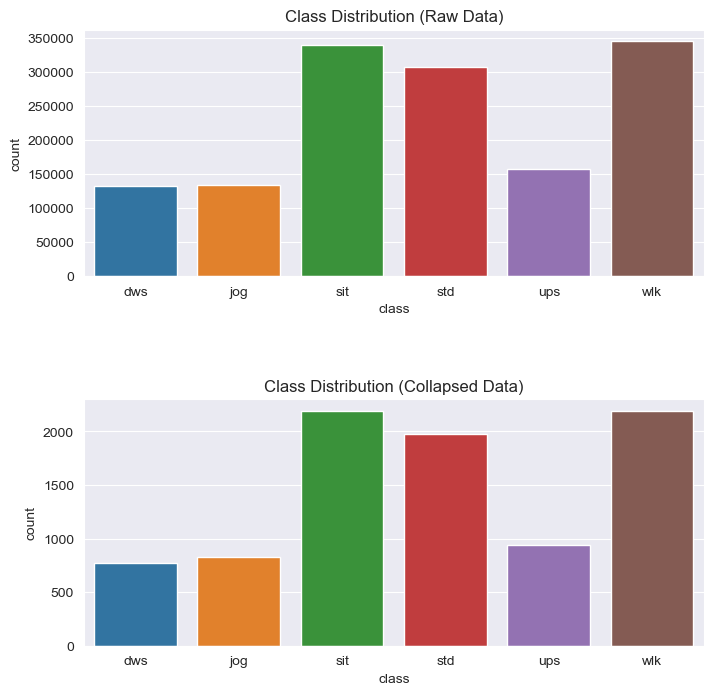

In [9]:
fig, axes = plt.subplots(2, 1, figsize=(8,8))
plt.subplots_adjust(hspace = 0.5)
sns.countplot(x="class",data=raw_dataset, ax=axes[0]).set(title="Class Distribution (Raw Data)")
sns.countplot(x="class", data=collapsed_dataset, ax=axes[1]).set(title="Class Distribution (Collapsed Data)")

In [10]:
# Have a look a some signals for sitting
ACTIVITY_CODES_s = ["sit"]
TRIAL_CODES_s = { ACTIVITY_CODES_s[0]:[13]}
sitting_subjects = []
for i in range(5, 11):
    sitting_subjects.append(create_time_series_speed_up(ACTIVITY_CODES_s, TRIAL_CODES_s, [i], mode="raw"))

Text(0.5, 1.0, 'Different lenght of Trial 13 (Sitting) for some subjects')

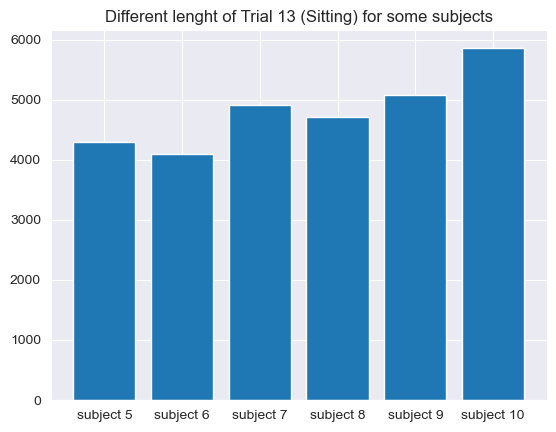

In [11]:
# Trials seem to have different duration
labels = ["subject 5", "subject 6", "subject 7", "subject 8", "subject 9", "subject 10"]
lengths = [x.shape[0] for x in sitting_subjects]
plt.bar(labels, lengths)
plt.title("Different lenght of Trial 13 (Sitting) for some subjects")

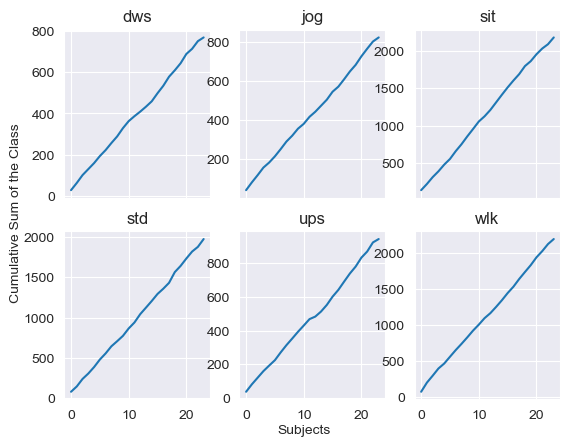

In [12]:
fig, axes = plt.subplots(2, 3, sharex=True)
index = 0
fig.text(0.5, 0.04, 'Subjects', ha='center')
fig.text(0.04, 0.5, 'Cumulative Sum of the Class', va='center', rotation='vertical')
for act in ACTIVITY_CODES:
    length_act = []
    for i in ACTORS:
        df_temp = create_time_series_speed_up([act], TRIAL_CODES, [i])
        length_act.append(df_temp["class"].count())
    axes[int(index/3)][index%3].plot(np.cumsum(length_act))
    axes[int(index/3)][index%3].set_title(str(act))
    index += 1

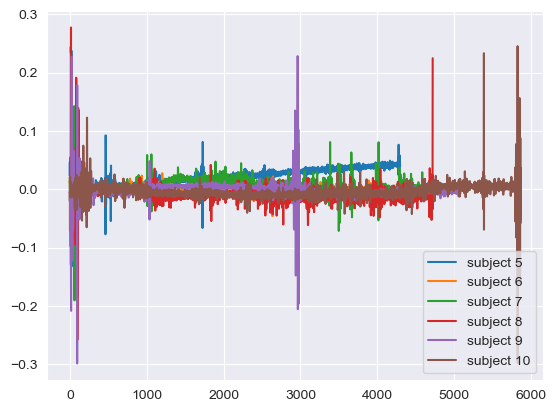

In [13]:
labels = ["subject 5", "subject 6", "subject 7", "subject 8", "subject 9", "subject 10"]
for i in range(0, 6):
  plt.plot(sitting_subjects[i].index, sitting_subjects[i]["userAcceleration.x"])
plt.legend(labels)

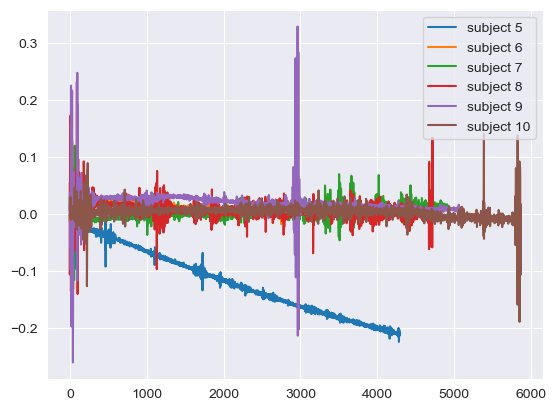

In [14]:
labels = ["subject 5", "subject 6", "subject 7", "subject 8", "subject 9", "subject 10"]
for i in range(0, 6):
    plt.plot(sitting_subjects[i].index, sitting_subjects[i]["userAcceleration.y"])
plt.legend(labels)

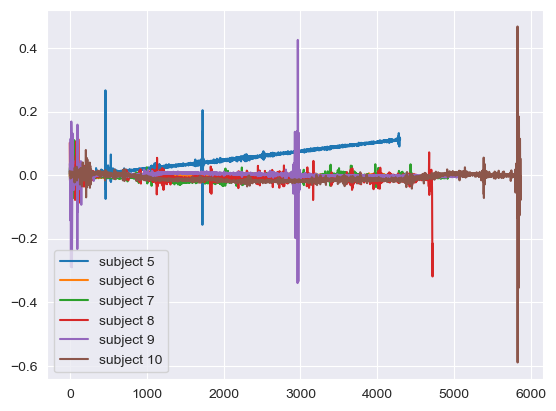

In [15]:
labels = ["subject 5", "subject 6", "subject 7", "subject 8", "subject 9", "subject 10"]
for i in range(0, 6):
    plt.plot(sitting_subjects[i].index, sitting_subjects[i]["userAcceleration.z"])
plt.legend(labels)

#### What do we learn from this exploratory data analysis:
- First, both raw dataset and collapsed dataset (with aggregated features) doesn't have any NaN value
- Secondly, we noticed that the class distribution is a bit unbalanced, with (for example), "jogging" having < 50% of walking class. We have seen that trials have different length, and so It has been this fact that lead the dataset to be unbalanced.
- Thirdly, we wanted to know if some actors contributed differently between each other in class counting, but the plotting of the cumulative sum varying subjects proves that each subject contributed more or less equally in that. That's a good news, looking for a custom cross validation that involves the division in subjects instead of the entire dataset.

Moreover, we tested methods in the notebook _"raw_data_visualization"_ and we discovered that **subject 5** had a really strange behaviur during trial 13 (sitting).

### Step 2: Data Cleaning
We already stated that there's no NaN value, so in this phase we want to determine:
- What type of smoothing, if necessary, we should use
- _Dimensionality Reduction_ : we want to state if some attributes are "too much" correlated, and so try to understand if we chan chop out some of them.

_A note_: We decided to perform the task of having a sight on correlation *before* feature extraction. In this manner, we expect to have better results later.

In [16]:
from scipy.signal import savgol_filter

def noise_filter(data, k=10, pol=2):
    dataframe = data.copy()
    for column in dataframe.columns:
        dataframe[column] = savgol_filter(dataframe[column], k, pol, axis=0)
    return dataframe

In [17]:
act = ["jog"]

trial = {
    act[0]:[9],
}

In [18]:
little_test = create_time_series_speed_up(act, trial, [5], mode="raw")
little_test = little_test[100:250]
little_test.drop("class", axis=1, inplace=True)

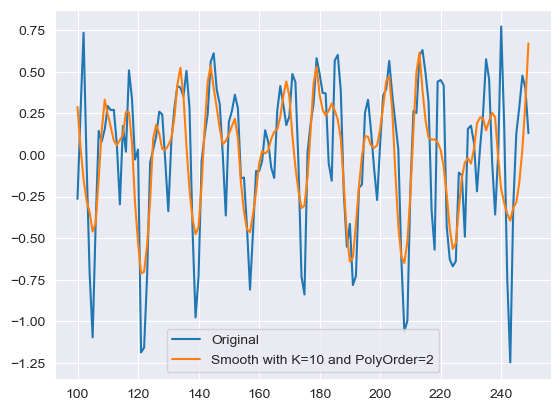

In [19]:
plt.plot(little_test["userAcceleration.x"])
plt.plot(noise_filter(little_test)["userAcceleration.x"])
plt.legend(["Original", "Smooth with K=10 and PolyOrder=2"])

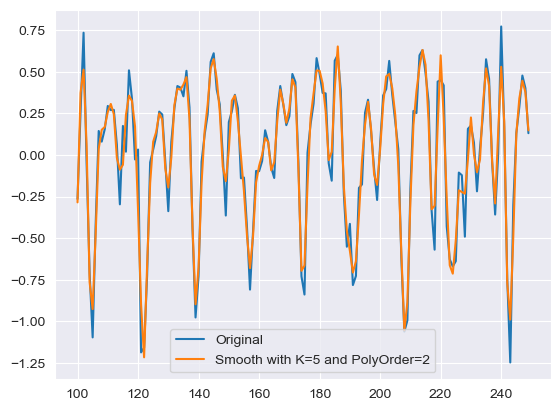

In [20]:
plt.plot(little_test["userAcceleration.x"])
plt.plot(noise_filter(little_test, k=5, pol=2)["userAcceleration.x"])
plt.legend(["Original", "Smooth with K=5 and PolyOrder=2"])

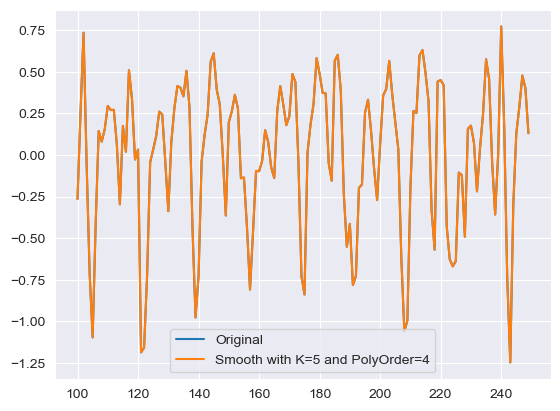

In [21]:
plt.plot(little_test["userAcceleration.x"])
plt.plot(noise_filter(little_test, k=5, pol=4)["userAcceleration.x"])
plt.legend(["Original", "Smooth with K=5 and PolyOrder=4"])

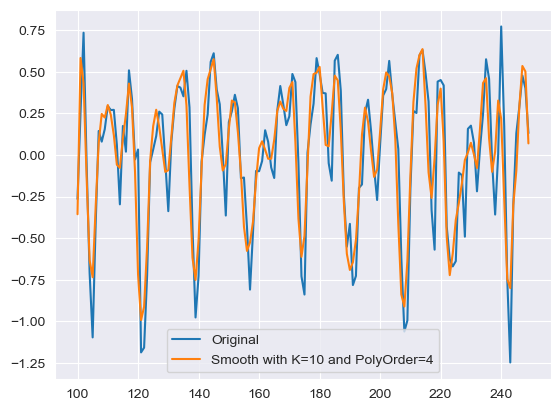

In [22]:
plt.plot(little_test["userAcceleration.x"])
plt.plot(noise_filter(little_test, k=10, pol=4)["userAcceleration.x"])
plt.legend(["Original", "Smooth with K=10 and PolyOrder=4"])

We chose to filter K = 5 and PolyOrder = 2, to have a not so high smooth ratio and preserve qualitatively the true height of peaks

Before continuing, we decided to drop trial 13 (sitting) of subject 5 because, as we have seen above, it has some errors inside

In [5]:
new_dataset = create_time_series_speed_up(ACTIVITY_CODES, TRIAL_CODES, ACTORS, exclude_5=True)